In [12]:
#========================= Imports =======================
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [3]:
data = pd.read_csv('train_data.csv')
len(data)


28624

In [4]:
#========================= Organização dos dados de treinamento =======================
x_train = data[['order_freight_value', 'product_description_lenght', 'delta_days', 'pos_prob', 'neg_prob', 'neu_prob','customer_state_AC',
       'customer_state_AL', 'customer_state_AM', 'customer_state_AP',
       'customer_state_BA', 'customer_state_CE', 'customer_state_DF',
       'customer_state_ES', 'customer_state_GO', 'customer_state_MA',
       'customer_state_MG', 'customer_state_MS', 'customer_state_MT',
       'customer_state_PA', 'customer_state_PB', 'customer_state_PE',
       'customer_state_PI', 'customer_state_PR', 'customer_state_RJ',
       'customer_state_RN', 'customer_state_RO', 'customer_state_RR',
       'customer_state_RS', 'customer_state_SC', 'customer_state_SE',
       'customer_state_SP', 'customer_state_TO']]
y_train = data['review_score']

In [14]:
#========================= Aplicação do programa de Random Forest =======================
regr = RandomForestRegressor(n_estimators=100, max_depth=None)
regr.fit(x_train,y_train)
regr.feature_importances_

array([4.89806418e-02, 5.03882929e-02, 4.14946503e-02, 8.14441214e-02,
       6.79746351e-01, 6.14687182e-02, 1.27544758e-04, 4.93069427e-04,
       3.59300910e-04, 8.86592638e-05, 2.28419671e-03, 1.14131841e-03,
       1.55459950e-03, 1.51249539e-03, 1.78053887e-03, 8.41224984e-04,
       4.09975574e-03, 8.41901856e-04, 9.61116933e-04, 9.75374620e-04,
       6.13098799e-04, 1.40105523e-03, 2.75001489e-04, 2.07555774e-03,
       4.03862006e-03, 5.36539546e-04, 6.20881062e-04, 1.40466305e-04,
       2.36523912e-03, 2.09991961e-03, 2.90886454e-04, 4.39109927e-03,
       5.67762444e-04])

In [15]:
#========================= Crossvalidation =======================
cross = cross_val_score(regr, x_train, y_train, cv=10)

In [16]:
#================== Média do crossvalidation ================
np.mean(cross)

0.6998768538844283

In [7]:
test_data = pd.read_csv('test_data.csv')
len(test_data)

12268

In [8]:
#========================= Organização dos dados de teste =======================
x_test = test_data[['order_freight_value', 'product_description_lenght', 'delta_days', 'pos_prob', 'neg_prob', 'neu_prob', 'customer_state_AC',
       'customer_state_AL', 'customer_state_AM', 'customer_state_AP',
       'customer_state_BA', 'customer_state_CE', 'customer_state_DF',
       'customer_state_ES', 'customer_state_GO', 'customer_state_MA',
       'customer_state_MG', 'customer_state_MS', 'customer_state_MT',
       'customer_state_PA', 'customer_state_PB', 'customer_state_PE',
       'customer_state_PI', 'customer_state_PR', 'customer_state_RJ',
       'customer_state_RN', 'customer_state_RO', 'customer_state_RR',
       'customer_state_RS', 'customer_state_SC', 'customer_state_SE',
       'customer_state_SP', 'customer_state_TO']]
y_test = test_data['review_score']

In [26]:
#========================= Predict =======================
predictions = (regr.predict(x_test))

In [25]:
#========================= Adiciona uma coluna predictions ao database =======================
test_data['Prediction'] = predictions
test_data.head()

,Unnamed: 0,order_products_value,order_freight_value,product_description_lenght,product_photos_qty,review_score,review_comment_message,delta_days,Classificacao,customer_state_AC,...,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,pos_prob,neg_prob,neu_prob,Prediction
0,13020,49.00,17.65,348,2,1,demora demais para entrega do produto,23.0,-1,0,...,0,0,0,0,0,0,0.802357,0.152163,0.045480,1.89
1,60824,890.00,116.87,543,1,5,produto recebido no prazo e em perfeitas condi...,19.0,1,0,...,0,1,0,0,0,0,0.999416,0.000187,0.000397,4.73
2,8239,129.00,12.32,617,3,4,houve um pouco de demora mas deu tudo certo ob...,17.0,1,0,...,0,0,0,0,1,0,0.933255,0.000794,0.065951,3.30
3,13247,117.99,9.64,916,1,5,obrigado eu recomendo baratheon,4.0,1,0,...,0,0,0,0,1,0,0.991217,0.006855,0.001928,4.57
4,64389,179.40,53.01,1991,2,5,lindo o papel de parede,14.0,1,0,...,0,0,0,0,0,0,0.970413,0.008010,0.021576,4.62


In [26]:
#========================= Imports =======================
from sklearn.metrics import r2_score
import numpy as np

In [27]:
#========================= Cálculo do R quadrado =======================
r2_score(y_test, predictions)

0.6522261736363673

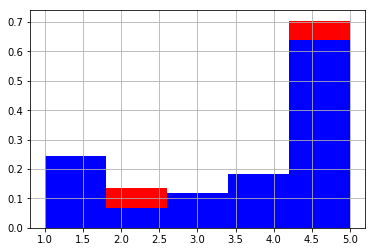

In [50]:
#========================= Visualização gráfica dos resultados da regressão =======================

test_data['Prediction'].hist(bins=5, density=True, color='red')
test_data['review_score'].hist(bins=5, density=True, color='blue')

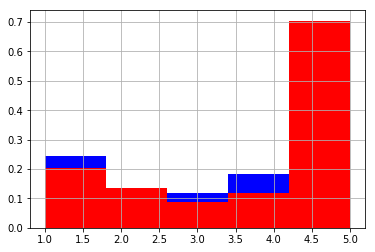

In [52]:
#========================= Visualização gráfica dos resultados da regressão =======================

test_data['review_score'].hist(bins=5, density=True, color='blue')
test_data['Prediction'].hist(bins=5, density=True, color='red')